# 使用决策树预测隐形眼镜类型

**说明:**

将数据集文件 'lenses.txt' 放在当前文件夹

In [1]:
import operator

In [2]:
from math import log

def calcShannonEnt(dataSet):
    numEntries = len(dataSet)
    labelCounts = {}
    for featVec in dataSet:
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    shannoEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries
        shannoEnt -= prob * log(prob, 2)
    return shannoEnt

In [3]:
def createDataSet():
    dataSet = [[1, 1, 'yes'],
              [1, 1, 'yes'],
              [1, 0, 'no'],
              [0, 1, 'no'],
              [0, 1, 'no']]
    labels = ['no surfacing', 'flippers']
    return dataSet, labels

## DataSet splitting on a given feature

In [4]:
def splitDataSet(dataSet, axis, value):
    retDataSet = []
    for featVec in dataSet:
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

## Choosing the best feature to split on

In [5]:
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0; bestFeature = -1
    for i in range(numFeatures):
        featureList = [example[i] for example in dataSet]
        uniqueVals = set(featureList)
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet)/float(len(dataSet))
            infoGain = baseEntropy - newEntropy
            if infoGain > bestInfoGain:
                bestInfoGain = infoGain
                bestFeature = i
    return bestFeature

In [6]:
def majorityCnt(classList):
    classCount={}
    for vote in classList:
        if vote not in classCount.keys(): classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.iteritems(),
                             key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

## Tree-building code

In [7]:
def createTree(dataSet, labels):
    classList = [example[-1] for example in dataSet]
    if classList.count(classList[0]) == len(classList):  # stop when all classe are equal
        return classList[0]
    if len(dataSet[0]) == 1:  # when no more features return majority
        return majorityCnt(classList)
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel:{}}
    del(labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat,value), subLabels)
    return myTree

In [8]:
def classify(inputTree, featLabels, testVec):
    firstStr = list(inputTree.keys())[0]
    secondDict = inputTree[firstStr]
    featIndex = featLabels.index(firstStr)
    #classLabel=""
    for key in secondDict.keys():
        if testVec[featIndex] == key:
            if type(secondDict[key]).__name__ == 'dict':
                classLabel = classify(secondDict[key], featLabels, testVec)
            else: classLabel = secondDict[key]
    return classLabel

## Methods for persisting the decision tree with pickle

In [9]:
def storeTree(inputTree,filename):
    import pickle
    fw = open(filename, 'wb')
    pickle.dump(inputTree, fw)
    fw.close()

def grabTree(filename):
    import pickle
    fr = open(filename,'rb')
    return pickle.load(fr)

importing Jupyter notebook from treePlotter.ipynb


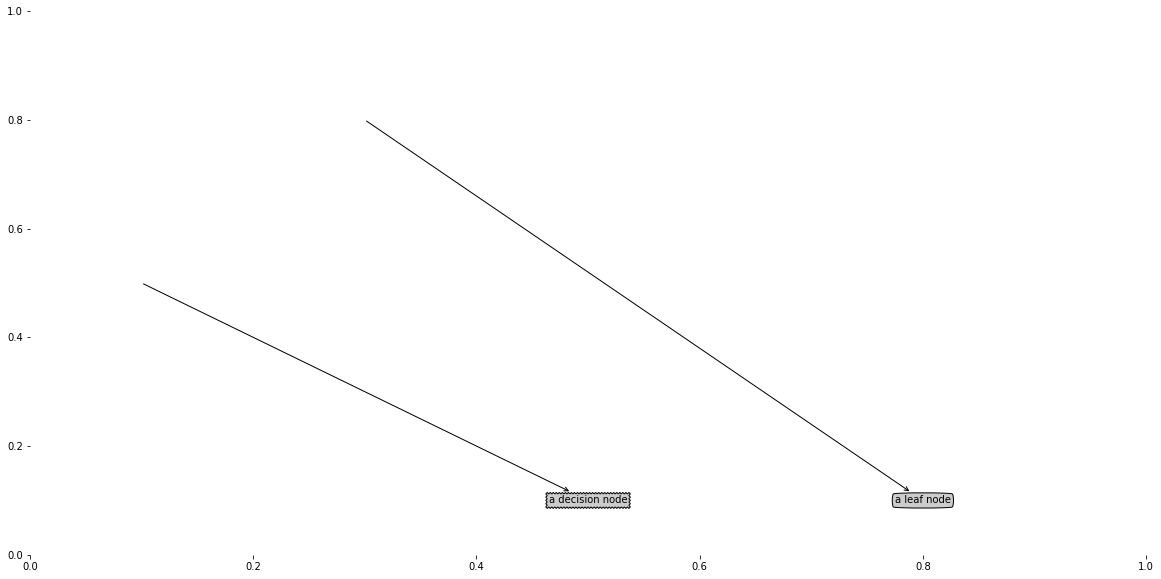

{'age': {'pre': {'prescript': {'myope': {'astigmatic': {'no': {'tearRate': {'normal': 'soft', 'reduced': 'no lenses'}}, 'yes': {'tearRate': {'normal': 'hard', 'reduced': 'no lenses'}}}}, 'hyper': {'astigmatic': {'no': {'tearRate': {'normal': 'soft', 'reduced': 'no lenses'}}, 'yes': 'no lenses'}}}}, 'young': {'prescript': {'myope': {'astigmatic': {'no': {'tearRate': {'normal': 'soft', 'reduced': 'no lenses'}}, 'yes': {'tearRate': {'normal': 'hard', 'reduced': 'no lenses'}}}}, 'hyper': {'astigmatic': {'no': {'tearRate': {'normal': 'soft', 'reduced': 'no lenses'}}, 'yes': {'tearRate': {'normal': 'hard', 'reduced': 'no lenses'}}}}}}, 'presbyopic': {'prescript': {'myope': {'astigmatic': {'no': 'no lenses', 'yes': {'tearRate': {'normal': 'hard', 'reduced': 'no lenses'}}}}, 'hyper': {'astigmatic': {'no': {'tearRate': {'normal': 'soft', 'reduced': 'no lenses'}}, 'yes': 'no lenses'}}}}}}


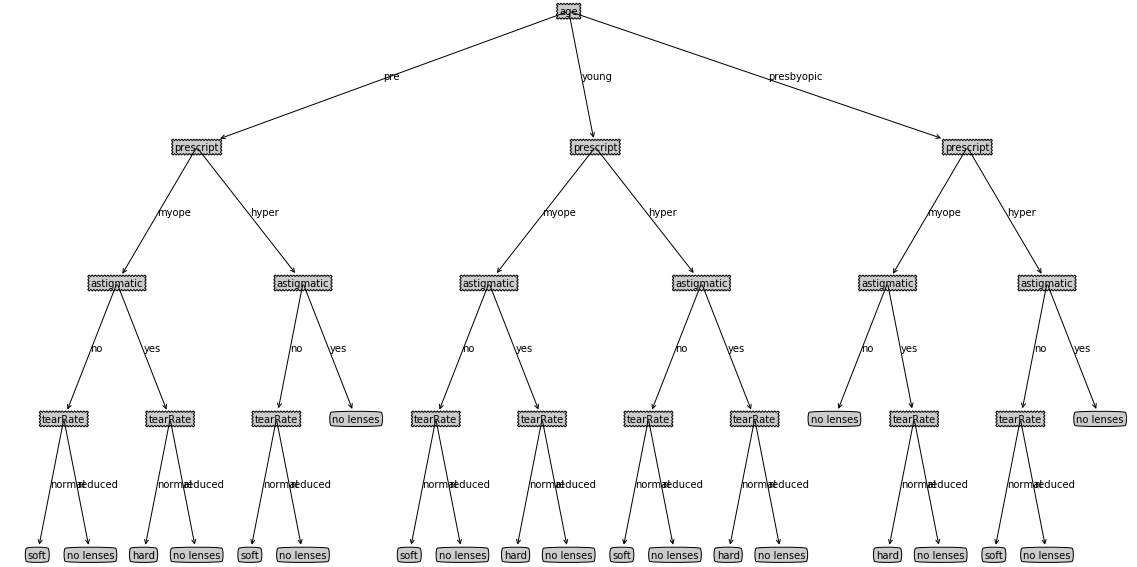

In [10]:
%matplotlib inline
import Ipynb_importer # 导入ipnb文件,像py文件一样调用
import treePlotter
fr=open('lenses.txt')
lenses=[inst.strip().split('\t') for inst in fr.readlines()]
lensesLabels=['age', 'prescript', 'astigmatic', 'tearRate']
lensesTree = createTree(lenses,lensesLabels)
print(lensesTree)
treePlotter.createPlot(lensesTree)